In [1]:
filename = "Big_Dump_of_running_Measurment"

In [10]:
import sys
"" in sys.modules

False

FileNotFoundError: [Errno 2] No such file or directory: 'Big_Dump_of_running_Measurmsetent'

In [13]:
import pickle 

filename = "Sample#2.pickle"

with open(filename,'wb') as f:
    pickle.dump(a.dataList[1::3],f)

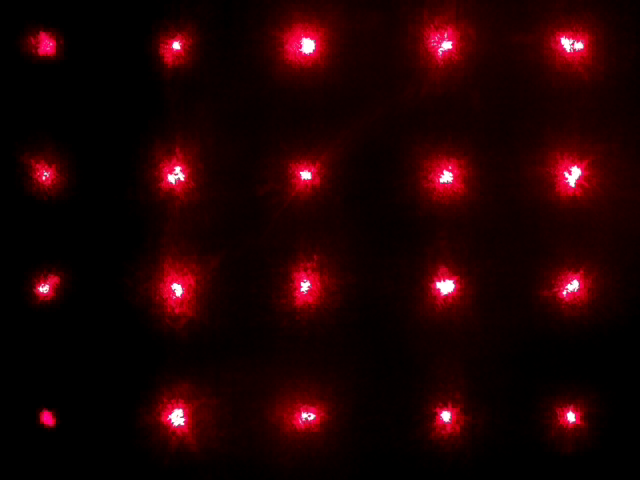

In [42]:
pickleLoad[0][0]

In [168]:
pickleLoad[0][10] + pickleLoad[0][8]

TypeError: unsupported operand type(s) for +: 'Image' and 'Image'

In [1]:
# Load Data 
import pickle
import numpy as np
import sys
sys.path.append("..")
import SHSlib  as sh
filename = "Big_Dump_of_running_Measurment"
with open(filename, "rb") as f:
    pickleLoad = pickle.load(f)

# Convert pillow Colour Image to 2D Numpy
def asNumpy(img):
    img = np.int16(img)
    img = np.uint8((img[:,:,0] + img[:,:,1] + img[:,:,2])/3)
    return img
Images = [asNumpy(img) for img in pickleLoad[0]]

#Paramether
min_distance = 40
cut_floor_under = 60 
for img in Images:
    img[img>cut_floor_under] = 0

ref = Images[0]
ref_lables = sh.analyse.getSeperation(ref,min_distance=min_distance)
ref_center = sh.analyse.getMomentum(ref_lables, ref) 

imgs = Images[1:]

N = len(imgs)

ShiftOverTimeX = np.zeros((len(ref_center[0]),N))
ShiftOverTimeY = np.zeros((len(ref_center[0]),N))

for i in range(len(imgs)):
    
    center = sh.analyse.getMomentum(ref_lables, imgs[i]) 
    partners = sh.analyse.getPartner(center, ref_center)
    dx = partners[0]
    dy = partners[1]
    ShiftOverTimeX[:,i] = dx
    ShiftOverTimeY[:,i] = dy



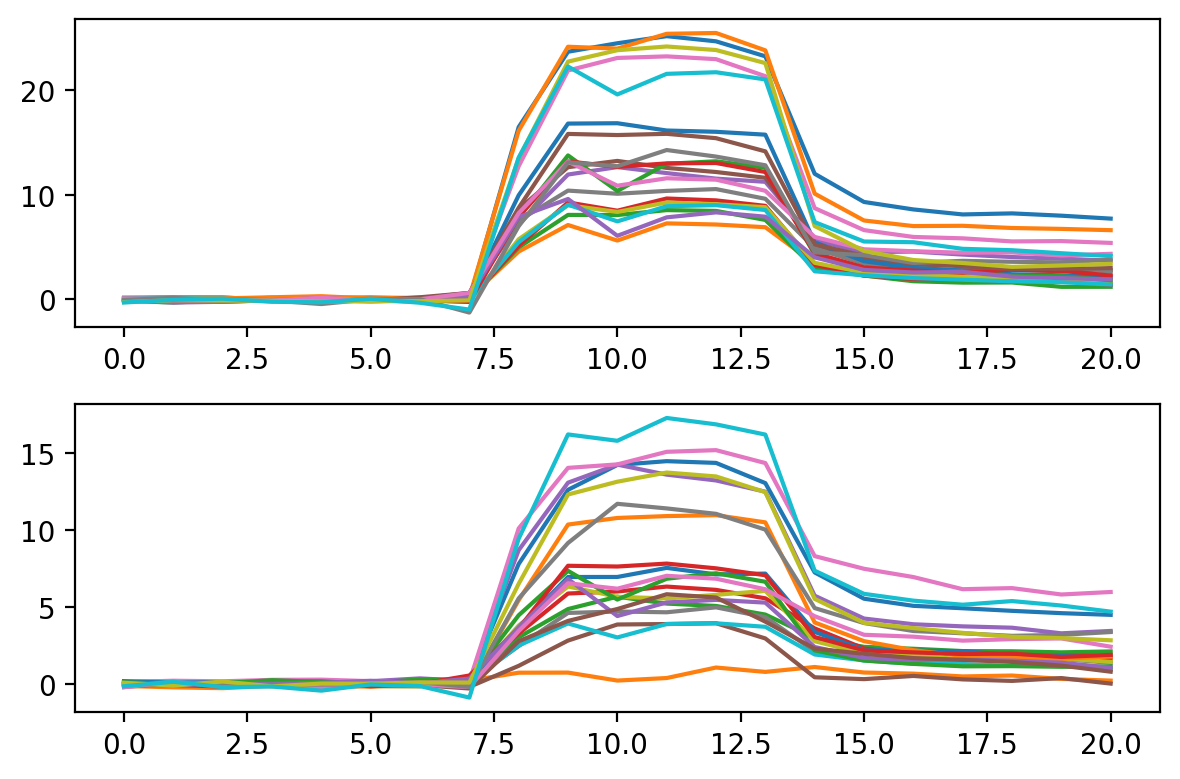

In [47]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,dpi=200)
axs[0].plot(ShiftOverTimeX.T)
axs[1].plot(ShiftOverTimeY.T)
plt.tight_layout()
plt.show()



## Fit to Zernike Polynom

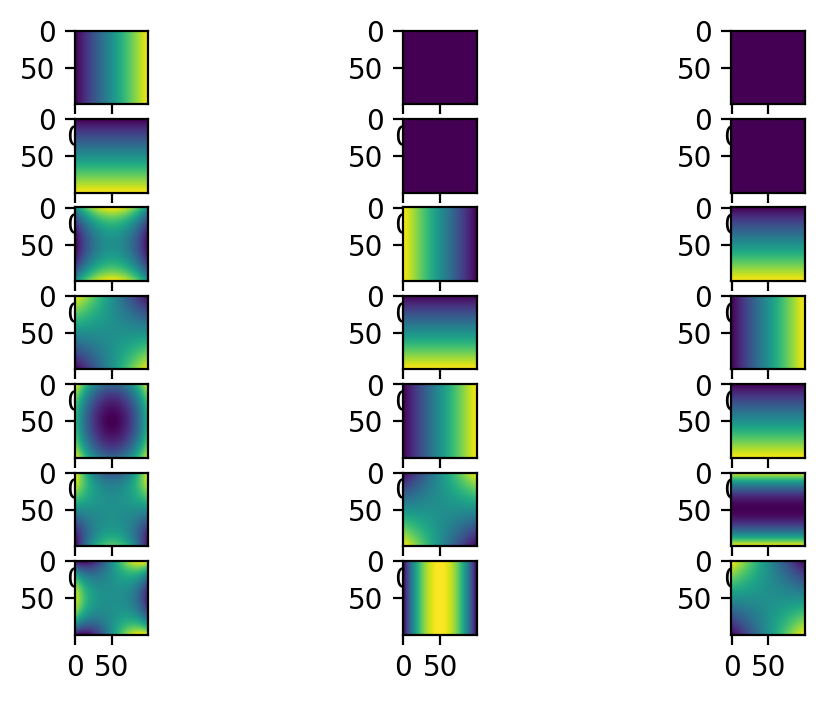

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Base Zernifunctions 
z1 = lambda x,y : x
z2 = lambda x,y : y
z3 = lambda x,y : -1*x**2 + y**2
z4 = lambda x,y : 2*x*y
z5 = lambda x,y : -1 + 2*x**2 + 2+y**2
z6 = lambda x,y : -3*x**2*y + y**3
z7 = lambda x,y : -1*x**3 + 2*x*y**2
#z8 = lambda x,y : -2y + 3*x**2 + 2+y**2

# first derivetive, with respect to x and y
z1dx = lambda x,y : np.ones_like(x)#1
z1dy = lambda x,y : np.zeros_like(x)

z2dx = lambda x,y : np.zeros_like(x)
z2dy = lambda x,y : np.ones_like(x)

z3dx = lambda x,y : -2*x
z3dy = lambda x,y : 2*y

z4dx = lambda x,y : 2*y
z4dy = lambda x,y : 2*x

z5dx = lambda x,y : 4*x
z5dy = lambda x,y : 2*y

z6dx = lambda x,y : -6*x*y
z6dy = lambda x,y : 2*y**2

z7dx = lambda x,y : -4*x**2
z7dy = lambda x,y : 4*x*y

Z = [z1,z2,z3,z4,z5,z6,z7]
Zdxdy = [z1dx,z1dy,z2dx,z2dy,z3dx,z3dy,z4dx,z4dy,
        z5dx,z5dy,z6dx,z6dy,z7dx,z7dy]
Zdx = Zdxdy[::2]
Zdy = Zdxdy[1::2]

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
[X,Y] = np.meshgrid(x,y)

fig,axs = plt.subplots(np.size(Z),3,dpi=200) 

for i in range(len(Z)):
    for j,p in enumerate([Z,Zdx,Zdy]):
        axs[i,j].imshow(p[i](X,Y))    

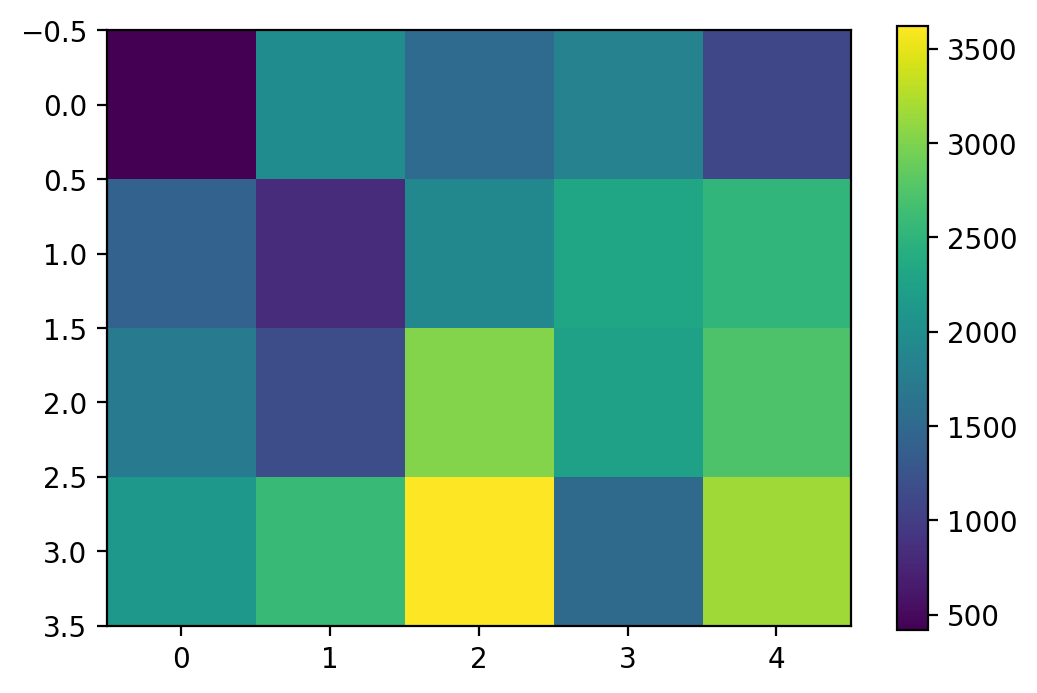

In [150]:
def getBaseZernikeValues(aHat,Xpos,Ypos):
    Z = [z1,z2,z3,z4,z5,z6,z7]

    Amp = np.zeros(len(XPos))
    for i in range(len(Z)):
        Amp = Amp + aHat[i]* Z[i](XPos,YPos)
    
    return Amp.reshape(4,5)


# calculate zernike Values for cordinates 
N = 7 # 1-7 coeffizienten 

XPos = ref_center[0].T
YPos = ref_center[1].T

aHat =  np.zeros((2*len(XPos),1))# Model Coeffizienten
M = np.zeros((2*len(XPos),1))    # Sensor Data 
Xi = np.zeros((N,2*len(XPos))) # Reconstruction Matrix

#Populate Xi Matrix with Model Values
for i in  range(N):
    Xi[i,0:len(XPos)] = Zdx[i](XPos,YPos)
    Xi[i,len(XPos):] = Zdy[i](XPos,YPos)
Xi = Xi.T

Coefficionas = np.zeros((N,len(ShiftOverTimeX[1,:])))
for i in range(len(ShiftOverTimeX[1,:])):
    
    M = np.hstack((ShiftOverTimeX[:,i],ShiftOverTimeY[:,i]))
    M = M[np.newaxis].T
    aHat = np.linalg.lstsq(Xi,M,rcond=None)[0]
    Coefficionas[:,i] = aHat.T

idex = 20
M = np.hstack((ShiftOverTimeX[:,idex],ShiftOverTimeY[:,idex]))
M = M[np.newaxis].T
aHat = np.linalg.lstsq(Xi,M,rcond=None)[0]

Amp = getBaseZernikeValues(aHat,XPos,YPos)
fig,axs = plt.subplots(dpi=200) 
c = axs.imshow(Amp)    
plt.colorbar(c)

In [171]:
a.min()



-0.10393265312153487

C:\Users\Hauke\AppData\Local\Temp\ipykernel_1880\2050106303.py:3: RuntimeWarning: divide by zero encountered in log
  c = plt.imshow(np.log(a -a.min()))


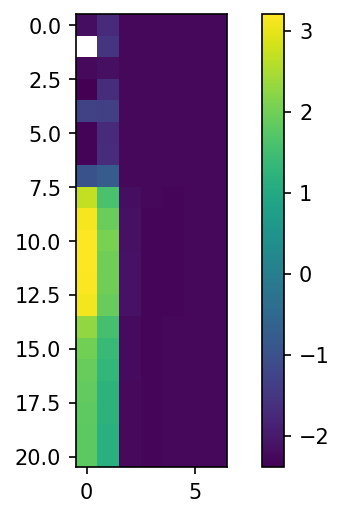

In [173]:
plt.figure(dpi=150)
a = Coefficionas.T
c = plt.imshow(np.log(a -a.min()))
plt.colorbar(c)   

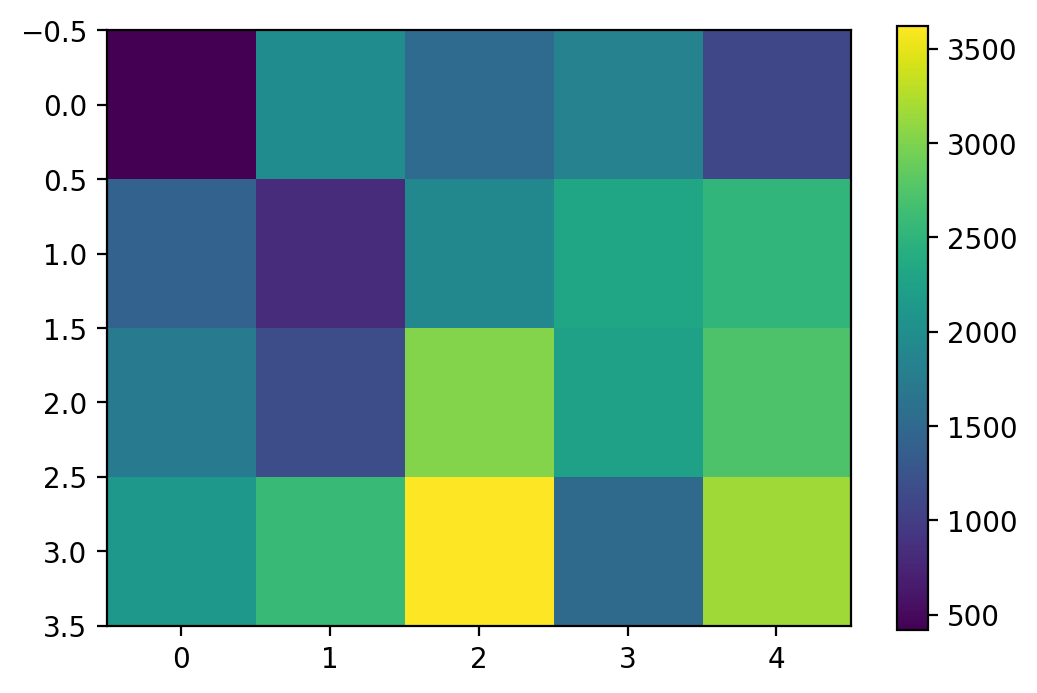

In [136]:
Z = [z1,z2,z3,z4,z5,z6,z7]

Amp = np.zeros(len(XPos))
for i in range(len(Z)):
    Amp = Amp + aHat[i]* Z[i](XPos,YPos)

fig,axs = plt.subplots(dpi=200) 
c = axs.imshow(Amp.reshape(4,5))    
plt.colorbar(c)

In [118]:
M.shape

(40,)

In [115]:
np.hstack((ShiftOverTimeX[:,-1],ShiftOverTimeY[:,-1])).shape
#np.array((ShiftOverTimeX[:,-1],ShiftOverTimeY[:,-1])).shape

(40,)